In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../utils')            # append our utility names
%matplotlib inline

# Load in the data

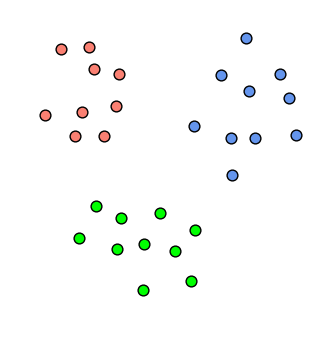

In [2]:
# load in the data and labels
data = np.asarray(pd.read_csv('../datasets/3class_data.csv'))
x = data[:,:-1]
y = data[:,-1]

# plot the data and true underlying data-generating function
import classification_level_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.plot_data(x,y)

# Insert your gradient descent code for logistic regression here

In [3]:
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*np.dot(x_p.T,w)))
    return cost[0]

In [4]:
# function for computing the logistic regression cost gradient
def compute_gradient(x,y,w):
    # produce gradient for each class weights
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

In [5]:
# gradient descent function for softmax cost/logistic regression 
def gradient_descent(x,y,w,alpha,K):
    # container for weight history
    whist = []
    
    # grad descent loop
    for j in range(K):
        # update container
        whist.append(w)
        
        # compute gradient
        grad = compute_gradient(x,y,w)
        w = w - alpha*grad;

        # update iteration count
    return whist

# Make a 1 versus all meta-loop

Our one versus all main loop - where we loop through each two-class subproblem and learn its respective weights.

In [51]:
# learn all C separators
def one_vs_all(x,y):
    W = []
    C = np.unique(y)
    for c in C:
        # prepare temporary subproblem labels
        y_temp = np.copy(y)
        ind = np.argwhere(y_temp == c)
        ind = [v[0] for v in ind]
        ind2 = np.argwhere(y_temp != c)
        ind2 = [v[0] for v in ind2]
        y_temp[ind] = 1
        y_temp[ind2] = -1
        
        # run descent algorithm for subproblem
        alpha = 10**-1
        K = 200
        w = np.random.randn(np.shape(x)[1] + 1,1);        # random initial point

        # run gradient descent
        whist = gradient_descent(x,y_temp,w,alpha,K)
        
        # print update
        print 'subproblem ' + str(c) + ' complete'

        # compute cost history from weight history
        ghist = []
        for k in range(K):
            w_k = whist[k]
            g_k = compute_cost_val(x,y_temp,w_k)
            ghist.append(g_k)
        plt.plot(ghist[10:])
        
        # store best weight from run
        wbest = whist[np.argmin(ghist)]
        wbest = whist[-1]
        W.append(wbest)
        
    # turn W into an array
    W = np.asarray(W)
    W = W[:,:,0]
    return W

subproblem 1.0 complete
subproblem 2.0 complete
subproblem 3.0 complete


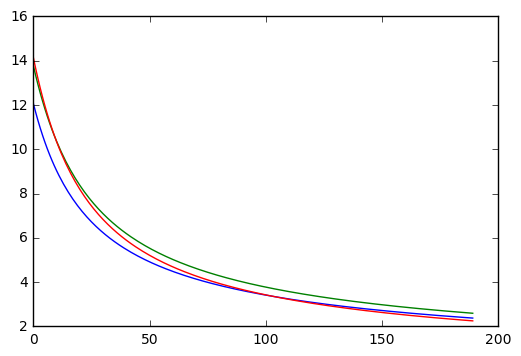

In [52]:
# run your one-versus-all function.  Should output weights for each individual classifier, which are fused when making prediction
W = one_vs_all(x,y)

# Plotting the results

Use the plotting function below to see how your multiclass boundary shaped up!  All you need to insert your C two-class classifiers' weights.  Make sure to put these into one numpy array - where you stack the weights columnwise - shaped as follows.

shape(W) = (3,C) 

where C is the number of classifiers.

In [53]:
import classification_level_1_utils as utils  # a set of simple plotting utilities for this notebook

# plot data and fused rule
def plot_fused_rule(W,data,labels):
    # plot data using utility 
    utils.plot_data(x,y)

    # plot classification boundary and color regions appropriately
    lower_bound = min(data.ravel())
    upper_bound = max(data.ravel())
    r = np.linspace(lower_bound - 0.1,upper_bound + 0.1,500)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    o = np.ones((np.shape(s)))
    h = np.concatenate((o,s,t),1)
    
    # use classifier to make predictions
    z = np.dot(h,W.T)
    z = np.argmax(z,axis = 1) + 1
    z.shape = (len(z),1)
    
    # reshape predictions for plotting
    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))
  
    # print everything - boundary and region colors
    unique_labels = np.unique(labels)

    # show the classification boundary if it exists
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k',linewidths = 2.5,levels = unique_labels)

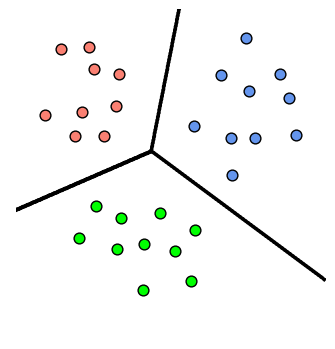

In [54]:
# use the multiclass plotting utility to show your fused boundary!
plot_fused_rule(W,x,y)